In [1]:
import pandas as pd
import geopandas as gpd
import numpy
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

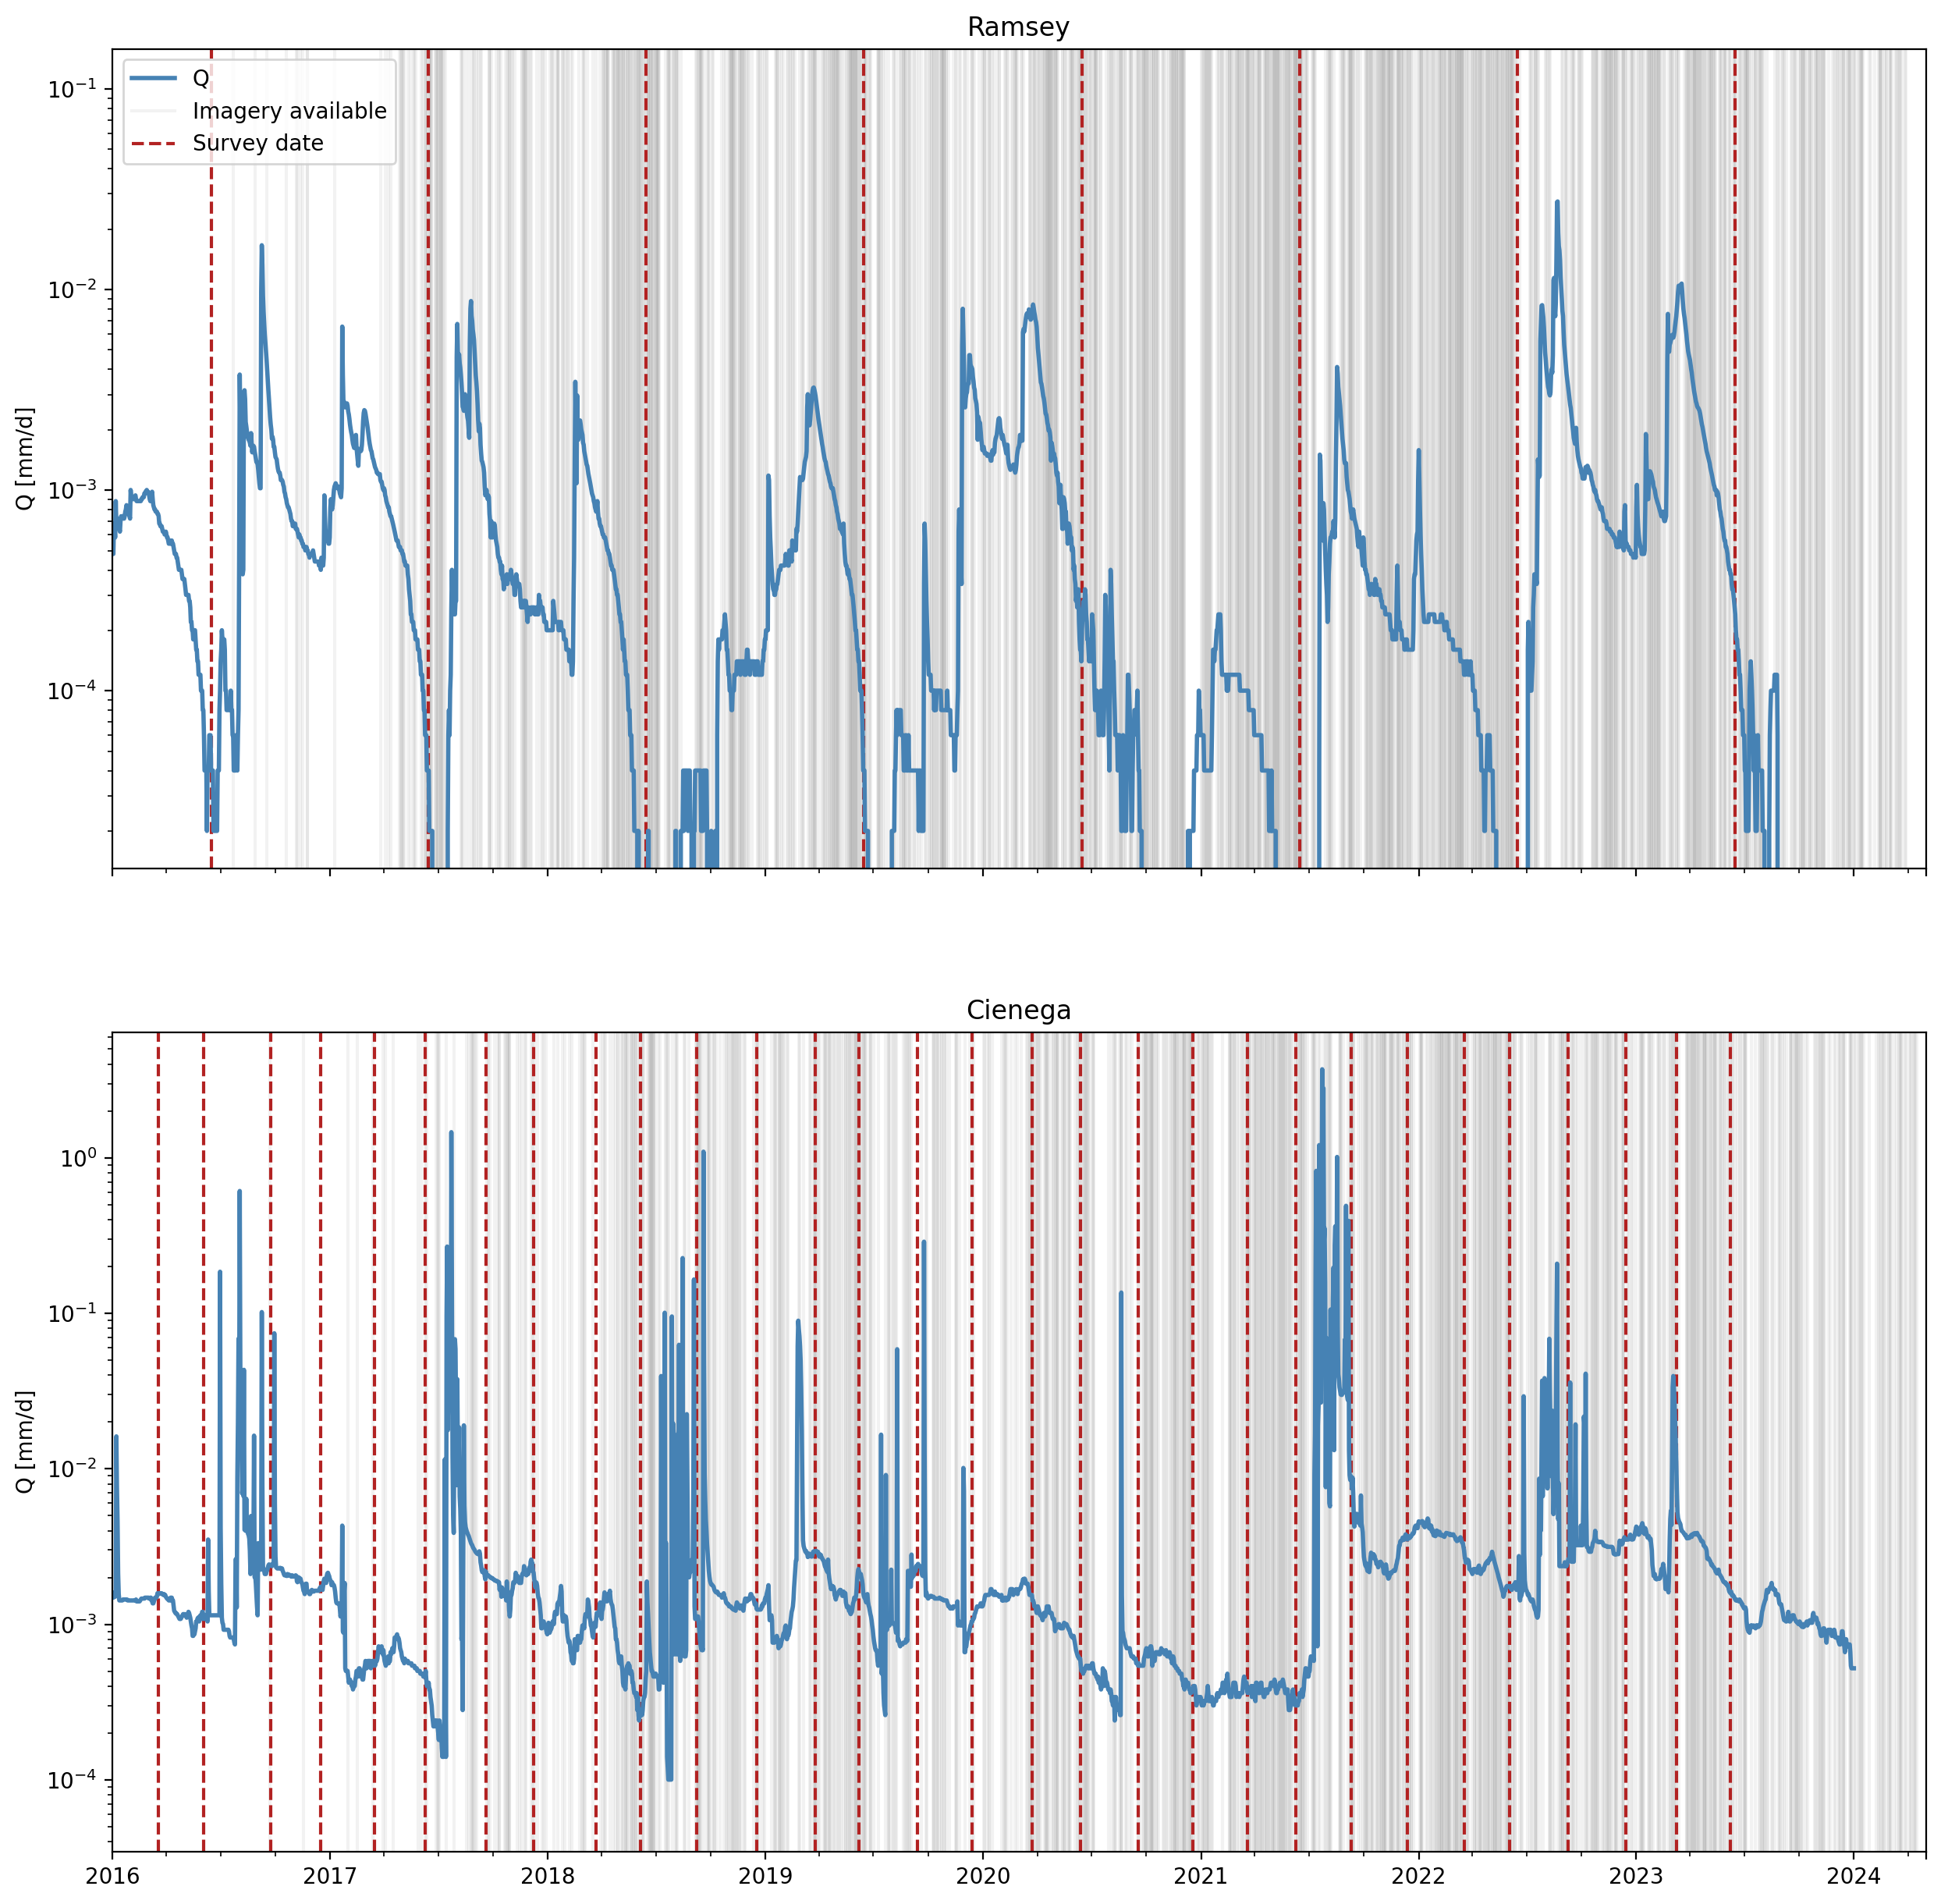

In [3]:
fig,axs = plt.subplots(2,figsize = (15,15),sharex=True)

locs = ['Ramsey','Cienega']
for i,loc in enumerate(locs):
    ax = axs[i]
    floc = '../data/'+loc+'/'+loc
    hydrodata = pd.read_csv(floc+'HydroData.csv',)
    try:
        hydrodata = hydrodata.rename(columns={'Unnamed: 0':'datetime'})
    except:
        continue
    hydrodata['datetime'] = pd.to_datetime(hydrodata['datetime'])
    hydrodata.set_index('datetime',inplace=True)
    hydrodata['Q [mm/d]'].plot(ax=ax,lw=2,c='steelblue',label='Q')

    imagedates = pd.read_csv(floc+'ImageryDates.csv')
    imagedates['date'] = pd.to_datetime(imagedates['date'])
    for j in range(len(imagedates)):
        if j==0:
            label = 'Imagery available'
        else:
            label = None
        ax.axvline(imagedates['date'].values[j],zorder=-2,alpha=.05,c='k',label = label)

    if loc=='Ramsey':
        surveyDates = [pd.to_datetime('6-15-'+str(y)) for y in range(2009,2024)]
    else:
        surveyDates = pd.read_csv(floc+'_survey_dates.csv')
        surveyDates['Cienega date'] = np.where(surveyDates['Cienega date'].isna(),
                                               surveyDates.mmddyyyy,
                                               surveyDates['Cienega date'])
        surveyDates['date'] = pd.to_datetime(surveyDates['Cienega date'])
        surveyDates = surveyDates['date'].values

    for j in range(len(surveyDates)):
        if j==0:
            label = 'Survey date'
        else:
            label = None
        ax.axvline(surveyDates[j],zorder = -2,c='firebrick',label=label,ls='--')

    
    ax.set_yscale('log')
    ax.set_title(loc)
    ax.set_xlabel('')
    ax.set_ylabel('Q [mm/d]')
    ax.set_xlim(pd.to_datetime('1-1-2016'),
                pd.to_datetime('5-1-2024'))

    if i==0:
        ax.legend()